In [1]:
import pandas as pd

In [4]:
data = pd.read_csv('C:/Users/hp/Documents/ODL/Assignment/cyberbullying_tweets.csv (2)/cyberbullying_tweets.csv')

In [5]:
data.to_csv('data.csv', index=False)

In [6]:
data.__dataframe__

<bound method DataFrame.__dataframe__ of                                               tweet_text cyberbullying_type
0      In other words #katandandre, your food was cra...  not_cyberbullying
1      Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2      @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3      @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4      @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying
...                                                  ...                ...
47687  Black ppl aren't expected to do anything, depe...          ethnicity
47688  Turner did not withhold his disappointment. Tu...          ethnicity
47689  I swear to God. This dumb nigger bitch. I have...          ethnicity
47690  Yea fuck you RT @therealexel: IF YOURE A NIGGE...          ethnicity
47691  Bro. U gotta chill RT @CHILLShrammy: Dog FUCK ...          ethnicity

[47692 rows x 2 columns]>

In [7]:
data.shape

(47692, 2)

In [8]:
data.describe()

,tweet_text,cyberbullying_type
count,47692,47692
unique,46017,6
top,RT @sailorhg: the intro for my hardware hackin...,religion
freq,2,7998


In [9]:
data.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [11]:
data = data.rename(columns = {'tweet_text':'TweetText','cyberbullying_type':'Sentiment'})

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetText  47692 non-null  object
 1   Sentiment  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [13]:
data.shape

(47692, 2)

In [14]:
data.isnull().sum()

TweetText    0
Sentiment    0
dtype: int64

In [15]:
data.Sentiment.value_counts()

Sentiment
religion               7998
age                    7992
gender                 7973
ethnicity              7961
not_cyberbullying      7945
other_cyberbullying    7823
Name: count, dtype: int64

<Axes: xlabel='Sentiment'>

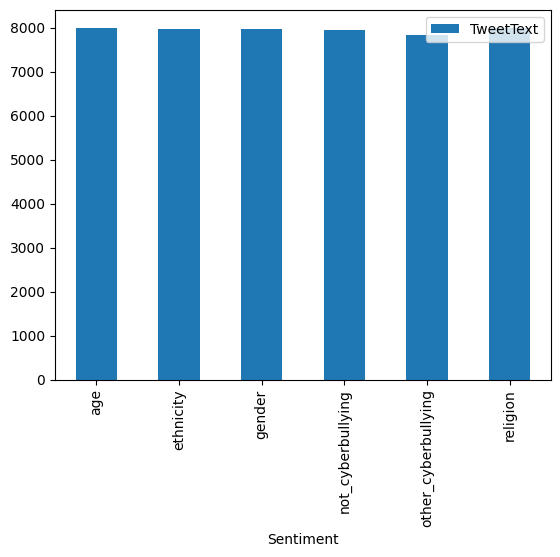

In [16]:
import matplotlib.pyplot as plt
data.groupby('Sentiment').count().plot(kind='bar')

In [17]:
tweet_len = pd.Series([len(tweet.split()) for tweet in data['TweetText']])
max_tweet_len = tweet_len.max()
min_tweet_len = tweet_len.min()
most_frequent_len = tweet_len.mode()[0]
print('Max tweet length: ', max_tweet_len)
print('Min tweet length: ', min_tweet_len)
print('Most frequent tweet length: ', most_frequent_len)

Max tweet length:  790
Min tweet length:  1
Most frequent tweet length:  20


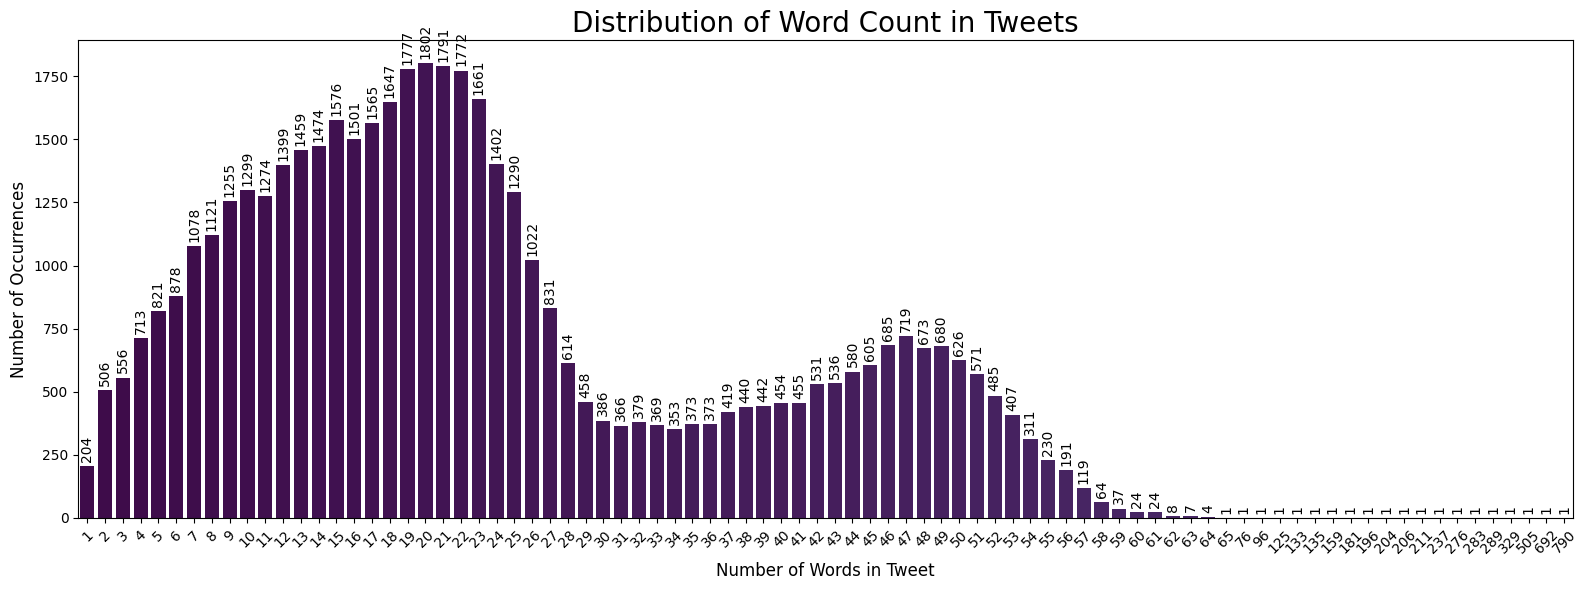

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of words in each tweet
tweet_len = pd.Series([len(tweet.split()) for tweet in data['TweetText']])

# Count occurrences of each word count
word_count_occurrence = tweet_len.value_counts().sort_index()

# Plot the bar chart
plt.figure(figsize=(16, 6))
ax = sns.barplot(
    x=word_count_occurrence.index, 
    y=word_count_occurrence.values, 
    hue=word_count_occurrence.index,  # Set hue as x variable
    palette="viridis", 
    dodge=False, 
    legend=False
)

# Add vertical labels with padding
for container in ax.containers:
    ax.bar_label(container, fontsize=10, rotation=90, label_type='edge', padding=3)  # Add padding

# Add title and axis labels
plt.title('Distribution of Word Count in Tweets', fontsize=20)
plt.xlabel('Number of Words in Tweet', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Adjust layout and show plot
plt.tight_layout()
plt.show()

In [30]:
tweet_len = pd.Series([len(str(tweet)) for tweet in data['TweetText']])
max_tweet_len = tweet_len.max()
min_tweet_len = tweet_len.min()
most_frequent_len = tweet_len.mode()[0]
print('Max tweet length: ', max_tweet_len)
print('Min tweet length: ', min_tweet_len)
print('Most frequent tweet length: ', most_frequent_len)

Max tweet length:  5018
Min tweet length:  1
Most frequent tweet length:  140


# **Data Preprocessing**

In [33]:
# duplicate_rows = data.duplicated().sum()
duplicate_rows = data.duplicated(subset=['TweetText']).sum()
duplicate_rows

1675

In [34]:
duplicate_rows = data[data.duplicated(keep=False)]
duplicate_rows

,TweetText,Sentiment
829,Our pancakes are selling like hotcakes Shaz - ...,not_cyberbullying
1712,This is the opportunity to prove ourselves lik...,not_cyberbullying
1758,Our pancakes are selling like hotcakes Shaz - ...,not_cyberbullying
1984,@TVWEEKmag: There is only 1 way to stay in the...,not_cyberbullying
2611,It wouldn't be fair. Kat knows NOTHING of fair...,not_cyberbullying
...,...,...
20604,A Pakistani court has sentenced 86 members of ...,religion
41403,"Still, Davis, who is gay, said he pays a socia...",ethnicity
46915,Racism won't stop as long as u stil select ur ...,ethnicity
46962,"Still, Davis, who is gay, said he pays a socia...",ethnicity


In [35]:
data_cleaned = data.drop_duplicates(subset=['TweetText'],keep='first')
data_cleaned = data_cleaned.reset_index(drop=True)
data_cleaned.shape

(46017, 2)

In [36]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46017 entries, 0 to 46016
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetText  46017 non-null  object
 1   Sentiment  46017 non-null  object
dtypes: object(2)
memory usage: 719.1+ KB


In [37]:
# Convert to lower case
data_cleaned['TweetText'] = data_cleaned['TweetText'].str.lower()
data_cleaned.head()

,TweetText,Sentiment
0,"in other words #katandandre, your food was cra...",not_cyberbullying
1,why is #aussietv so white? #mkr #theblock #ima...,not_cyberbullying
2,@xochitlsuckkks a classy whore? or more red ve...,not_cyberbullying
3,"@jason_gio meh. :p thanks for the heads up, b...",not_cyberbullying
4,@rudhoeenglish this is an isis account pretend...,not_cyberbullying


In [38]:
import emoji
print("Original Text: ", data_cleaned['TweetText'].loc[data_cleaned.index[21]])

# Removing URLs using regular expression
def strip_emoji(tweet):
    return emoji.replace_emoji(tweet, replace='')

#Apply function on TweetText column
data_cleaned['TweetText_clean']=data_cleaned['TweetText'].apply(strip_emoji)
print("Text After Removing Emojis: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[21]])

Original Text:  kids love😘❤ @ mohamad bin zayed city مدينة محمد بن زايد http://t.co/0xrozsnn
Text After Removing Emojis:  kids love @ mohamad bin zayed city مدينة محمد بن زايد http://t.co/0xrozsnn


In [39]:
import contractions

print("Original Text: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[18]])

# Remove links and mentions
def expand_contractions(tweet):
    return contractions.fix(tweet)

data_cleaned['TweetText_clean']=data_cleaned['TweetText_clean'].apply(expand_contractions)
print("Text after expanding contractions: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[18]])

Original Text:  best pick up line? hi, you're cute... ?: i love how people call james potter is a bully. - mypatronusisyou: http://tumblr.com/xol3xl14zy
Text after expanding contractions:  best pick up line? hi, you are cute... ?: i love how people call james potter is a bully. - mypatronusisyou: http://tumblr.com/xol3xl14zy


In [40]:
from langdetect import detect, LangDetectException

print("Original Text: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[6]])

# Function to check if the text is in English, and return an empty string if it's not
def filter_non_english(tweet):
    try:
        lang = detect(tweet)
    except LangDetectException:
        lang = "unknown"
    return tweet if lang == "en" else ""

data_cleaned['TweetText_clean']=data_cleaned['TweetText_clean'].apply(filter_non_english)
print("Text after filtering non-english: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[6]])

Original Text:  itu sekolah ya bukan tempat bully! ga jauh kaya neraka
Text after filtering non-english:  


In [41]:
import re

print("Original Text: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[13]])

# Remove links and mentions
def remove_special_characters(tweet):
    return re.sub(r"(?:\@|https?\://|www\.)\S+", "", tweet)  # Remove links and mentions

data_cleaned['TweetText_clean']=data_cleaned['TweetText_clean'].apply(remove_special_characters)
print("Text after removing links and mentions: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[13]])

Original Text:  rt @kurdsnews: turkish state has killed 241 children in last 11 years http://t.co/jlvke1epws  #news  ##googleçeviricitopluluğukürtçeyidee…
Text after removing links and mentions:  rt  turkish state has killed 241 children in last 11 years   #news  ##googleçeviricitopluluğukürtçeyidee…


In [42]:
print("Original Text: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[19]])

# Removing emoticons
def remove_emoticons(tweet):
    emoticon_pattern = r'[:;=Xx8]-?[)DPOo\]p\(\/\\|]|[<>]?[:;=8xX]-?[oO\]p\(\/\\|]|-?_?-|<3|\^\^'
    return re.sub(emoticon_pattern, '', tweet)

#Apply function on TweetText column
data_cleaned['TweetText_clean']=data_cleaned['TweetText_clean'].apply(remove_emoticons)
print("Text After Removing Emoticons: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[19]])

Original Text:  now i got to walk to classss?! i officially hate the stupid bus system! -_-
Text After Removing Emoticons:  now i got to walk to classss?! i officially hate the stupid bus system! 


In [43]:
print("Original Text: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[0]])

# Clean hashtags at the end of the sentence, and keep those in the middle of the sentence by removing just the # symbol
def clean_hashtags(tweet):
    # Remove hashtags at the end of the sentence
    new_tweet = re.sub(r'(\s+#[\w-]+)+\s*$', '', tweet).strip()
    
    # Remove the # symbol from hashtags in the middle of the sentence
    new_tweet = re.sub(r'#([\w-]+)', r'\1', new_tweet).strip()
    
    return new_tweet

data_cleaned['TweetText_clean']=data_cleaned['TweetText_clean'].apply(clean_hashtags)
print("Text after removing hashtags: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[0]])

Original Text:  in other words #katandandre, your food was crapilicious! #mkr
Text after removing hashtags:  in other words katandandre, your food was crapilicious!


In [44]:
print("Original Text: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[24]])

# Filter special characters such as & and $ present in some words
def filter_chars(text):
    return ' '.join('' if ('$' in word) or ('&' in word) else word for word in text.split())

data_cleaned['TweetText_clean']=data_cleaned['TweetText_clean'].apply(filter_chars)
print("Text after removing & and $: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[24]])

Original Text:  wishing my arena partner was on. &gt;.&gt;  really want to get some pvp happening.
Text after removing & and $:  wishing my arena partner was on.  really want to get some pvp happening.


In [45]:
print("Original Text: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[51]])

# Function for removing special characters
def remove_special_characters(tweet, remove_digits=True):
    pattern = r'[^a-zA-z0-9\s]'
    tweet = re.sub(pattern,'',tweet)
    return tweet

# Apply function on TweetText column
data_cleaned['TweetText_clean']= data_cleaned['TweetText_clean'].apply(remove_special_characters)

print("Text after removing special characters: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[51]])

Original Text:  kerala rte will lead to shutting down of 'badal' schools in backward areas  parents will mostly not allow them to join far away schools.
Text after removing special characters:  kerala rte will lead to shutting down of badal schools in backward areas  parents will mostly not allow them to join far away schools


In [46]:
print("Original Text: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[24]])

# Remove multiple spaces
def remove_mult_spaces(text):
    return re.sub(r'\s\s+', ' ', text)

data_cleaned['TweetText_clean']=data_cleaned['TweetText_clean'].apply(remove_mult_spaces)
print("Text after removing multiple spaces: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[24]])

Original Text:  wishing my arena partner was on  really want to get some pvp happening
Text after removing multiple spaces:  wishing my arena partner was on really want to get some pvp happening


In [47]:
import nltk
# nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

print("Original Text: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[0]])

# Lemmatize words
def tokenization(text):
    return word_tokenize(text)

# Apply word tokenization to each tweet in the 'TweetText' column
data_cleaned['TweetText_clean']=data_cleaned['TweetText_clean'].apply(tokenization)
print("Tokenized text: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[0]])

Original Text:  in other words katandandre your food was crapilicious
Tokenized text:  ['in', 'other', 'words', 'katandandre', 'your', 'food', 'was', 'crapilicious']


In [48]:
data_cleaned.head()

,TweetText,Sentiment,TweetText_clean
0,"in other words #katandandre, your food was cra...",not_cyberbullying,"[in, other, words, katandandre, your, food, wa..."
1,why is #aussietv so white? #mkr #theblock #ima...,not_cyberbullying,"[why, is, aussietv, so, white]"
2,@xochitlsuckkks a classy whore? or more red ve...,not_cyberbullying,"[a, classy, whore, or, more, red, velvet, cupc..."
3,"@jason_gio meh. :p thanks for the heads up, b...",not_cyberbullying,"[meh, thanks, for, the, heads, up, but, not, t..."
4,@rudhoeenglish this is an isis account pretend...,not_cyberbullying,"[this, is, an, isis, account, pretending, to, ..."


In [49]:
from nltk.corpus import stopwords

print("Original Text: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[0]])
stopwords_list = set(stopwords.words('english'))

# Removing stopwords
def remove_stopwords(tokens):
  # Filter out stopwords and empty spaces from the tokens
  filtered_tokens = [word for word in tokens if word not in stopwords_list and word.strip() != '']
  return filtered_tokens

# Apply word tokenization to each tweet in the 'TweetText' column
data_cleaned['TweetText_clean']=data_cleaned['TweetText_clean'].apply(remove_stopwords)
print("Text after removing stopwords: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[0]])

Original Text:  ['in', 'other', 'words', 'katandandre', 'your', 'food', 'was', 'crapilicious']
Text after removing stopwords:  ['words', 'katandandre', 'food', 'crapilicious']


In [50]:
from nltk.stem import WordNetLemmatizer

print("Original Text: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[0]])

# Lemmatize words
def lemmatize(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

data_cleaned['TweetText_clean']=data_cleaned['TweetText_clean'].apply(lemmatize)
print("Text after lemmatization: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[0]])

Original Text:  ['words', 'katandandre', 'food', 'crapilicious']
Text after lemmatization:  word katandandre food crapilicious


In [51]:
print("Original Text: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[67]])

# Remove short words
def remove_short_words(tweet, min_len=2):
    return ' '.join([word for word in tweet.split() if len(word) > min_len])

data_cleaned['TweetText_clean']=data_cleaned['TweetText_clean'].apply(remove_short_words)
print("Text after removing short words: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[67]])

Original Text:  rt daesh distrbuting stolen youn humanitarian aid w logo
Text after removing short words:  daesh distrbuting stolen youn humanitarian aid logo


In [52]:
print("Original Text: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[19]])

# Replace elongated words
def replace_elongated_words(tweet):
    regex_pattern = r'\b(\w+)((\w)\3{2,})(\w*)\b'
    return re.sub(regex_pattern, r'\1\3\4', tweet)

data_cleaned['TweetText_clean']=data_cleaned['TweetText_clean'].apply(replace_elongated_words)
print("Text after replacing elongated words: ", data_cleaned['TweetText_clean'].loc[data_cleaned.index[19]])

Original Text:  got walk classss officially hate stupid bus system
Text after replacing elongated words:  got walk class officially hate stupid bus system


In [53]:
def remove_short_tweets(tweet):
    return tweet if len(tweet.split()) > 3 else None

data_cleaned['TweetText_clean']=data_cleaned['TweetText_clean'].apply(remove_short_tweets)

# Remove rows where TweetText_clean is None
data_cleaned = data_cleaned.dropna(subset=['TweetText_clean']).reset_index(drop=True)

In [54]:
def remove_long_tweets(tweet):
    return tweet if len(tweet.split()) < 100 else None

data_cleaned['TweetText_clean']=data_cleaned['TweetText_clean'].apply(remove_long_tweets)

# Remove rows where TweetText_clean is None
data_cleaned = data_cleaned.dropna(subset=['TweetText_clean']).reset_index(drop=True)

In [ ]:
data_cleaned['TweetText_len'] = data_cleaned['TweetText_clean'].apply(lambda x: len(str(x).split()))
data_cleaned

,TweetText,Sentiment,TweetText_clean,TweetText_len
0,"in other words #katandandre, your food was cra...",not_cyberbullying,word katandandre food crapilicious,4
1,@xochitlsuckkks a classy whore? or more red ve...,not_cyberbullying,classy whore red velvet cupcake,5
2,"@jason_gio meh. :p thanks for the heads up, b...",not_cyberbullying,meh thanks head concerned another angry dude t...,8
3,@rudhoeenglish this is an isis account pretend...,not_cyberbullying,isi account pretending kurdish account like is...,8
4,"@raja5aab @quickieleaks yes, the test of god i...",not_cyberbullying,yes test god good bad indifferent weird whatev...,11
...,...,...,...,...
40010,"black ppl aren't expected to do anything, depe...",ethnicity,black people eected anything depended anything...,21
40011,turner did not withhold his disappointment. tu...,ethnicity,turner withhold disappointment turner called c...,29
40012,i swear to god. this dumb nigger bitch. i have...,ethnicity,swear god dumb nigger bitch got bleach hair re...,12
40013,yea fuck you rt @therealexel: if youre a nigge...,ethnicity,yea fuck nigger fucking unfollow fucking dumb ...,8


In [56]:
data_cleaned.isnull().sum()

TweetText          0
Sentiment          0
TweetText_clean    0
TweetText_len      0
dtype: int64

In [57]:
data_cleaned.head()

,TweetText,Sentiment,TweetText_clean,TweetText_len
0,"in other words #katandandre, your food was cra...",not_cyberbullying,word katandandre food crapilicious,4
1,@xochitlsuckkks a classy whore? or more red ve...,not_cyberbullying,classy whore red velvet cupcake,5
2,"@jason_gio meh. :p thanks for the heads up, b...",not_cyberbullying,meh thanks head concerned another angry dude t...,8
3,@rudhoeenglish this is an isis account pretend...,not_cyberbullying,isi account pretending kurdish account like is...,8
4,"@raja5aab @quickieleaks yes, the test of god i...",not_cyberbullying,yes test god good bad indifferent weird whatev...,11


In [58]:
data_cleaned.Sentiment.value_counts()

Sentiment
religion               7882
age                    7877
ethnicity              7429
gender                 7186
not_cyberbullying      5298
other_cyberbullying    4343
Name: count, dtype: int64

In [59]:
# duplicate_rows = data.duplicated().sum()
duplicate_rows = data_cleaned.duplicated(subset=['TweetText']).sum()
duplicate_rows

12

In [60]:
data_cleaned = data_cleaned.drop_duplicates(subset=['TweetText'],keep='first')
data_cleaned = data_cleaned.reset_index(drop=True)
data_cleaned.shape

(40003, 4)

In [61]:
data_cleaned.Sentiment.value_counts()

Sentiment
religion               7882
age                    7867
ethnicity              7428
gender                 7185
not_cyberbullying      5298
other_cyberbullying    4343
Name: count, dtype: int64

In [62]:
data_cleaned = data_cleaned[data_cleaned["Sentiment"]!="other_cyberbullying"]
data_cleaned = data_cleaned.reset_index(drop=True)

In [63]:
data_cleaned.Sentiment.value_counts()

Sentiment
religion             7882
age                  7867
ethnicity            7428
gender               7185
not_cyberbullying    5298
Name: count, dtype: int64

In [64]:
data_cleaned.isnull().sum()

TweetText          0
Sentiment          0
TweetText_clean    0
TweetText_len      0
dtype: int64

In [65]:
data_cleaned.to_csv('data_cleaned.csv', index=False)

In [68]:
data

,TweetText,Sentiment
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depe...",ethnicity
47688,Turner did not withhold his disappointment. Tu...,ethnicity
47689,I swear to God. This dumb nigger bitch. I have...,ethnicity
47690,Yea fuck you RT @therealexel: IF YOURE A NIGGE...,ethnicity


In [69]:
data_cleaned

,TweetText,Sentiment,TweetText_clean,TweetText_len
0,"in other words #katandandre, your food was cra...",not_cyberbullying,word katandandre food crapilicious,4
1,@xochitlsuckkks a classy whore? or more red ve...,not_cyberbullying,classy whore red velvet cupcake,5
2,"@jason_gio meh. :p thanks for the heads up, b...",not_cyberbullying,meh thanks head concerned another angry dude t...,8
3,@rudhoeenglish this is an isis account pretend...,not_cyberbullying,isi account pretending kurdish account like is...,8
4,"@raja5aab @quickieleaks yes, the test of god i...",not_cyberbullying,yes test god good bad indifferent weird whatev...,11
...,...,...,...,...
35655,"black ppl aren't expected to do anything, depe...",ethnicity,black people eected anything depended anything...,21
35656,turner did not withhold his disappointment. tu...,ethnicity,turner withhold disappointment turner called c...,29
35657,i swear to god. this dumb nigger bitch. i have...,ethnicity,swear god dumb nigger bitch got bleach hair re...,12
35658,yea fuck you rt @therealexel: if youre a nigge...,ethnicity,yea fuck nigger fucking unfollow fucking dumb ...,8


In [70]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35660 entries, 0 to 35659
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TweetText        35660 non-null  object
 1   Sentiment        35660 non-null  object
 2   TweetText_clean  35660 non-null  object
 3   TweetText_len    35660 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


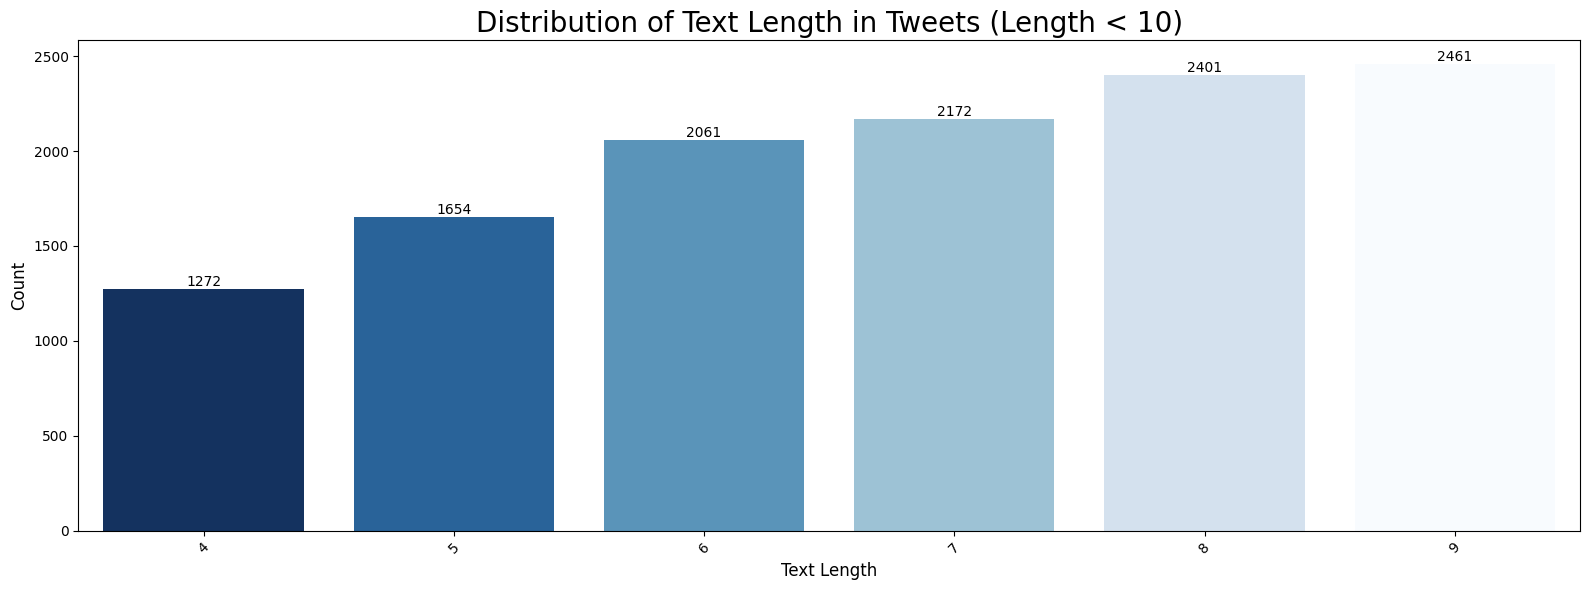

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 6))

# Create the countplot
ax = sns.countplot(
    x='TweetText_len',
    hue='TweetText_len',
    data=data_cleaned[data_cleaned['TweetText_len'] < 10],  # Filter for text length < 10
    palette='Blues_r',
    legend=False,
    order=data_cleaned[data_cleaned['TweetText_len'] < 10]['TweetText_len'].value_counts().sort_index().index
)

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container)

# Add title and axis labels
plt.title('Distribution of Text Length in Tweets (Length < 10)', fontsize=20)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Text Length', fontsize=12)

# Adjust the ticks and layout
plt.xticks(rotation=45, fontsize=10)
plt.tight_layout()

# Show the plot
plt.show()

In [72]:
# Calculate the total number of tweets with text length < 10
total_short_texts = data_cleaned[data_cleaned['TweetText_len'] < 10].shape[0]

# Print the result
print("Total number of tweets with text length < 10:", total_short_texts)

Total number of tweets with text length < 10: 12021


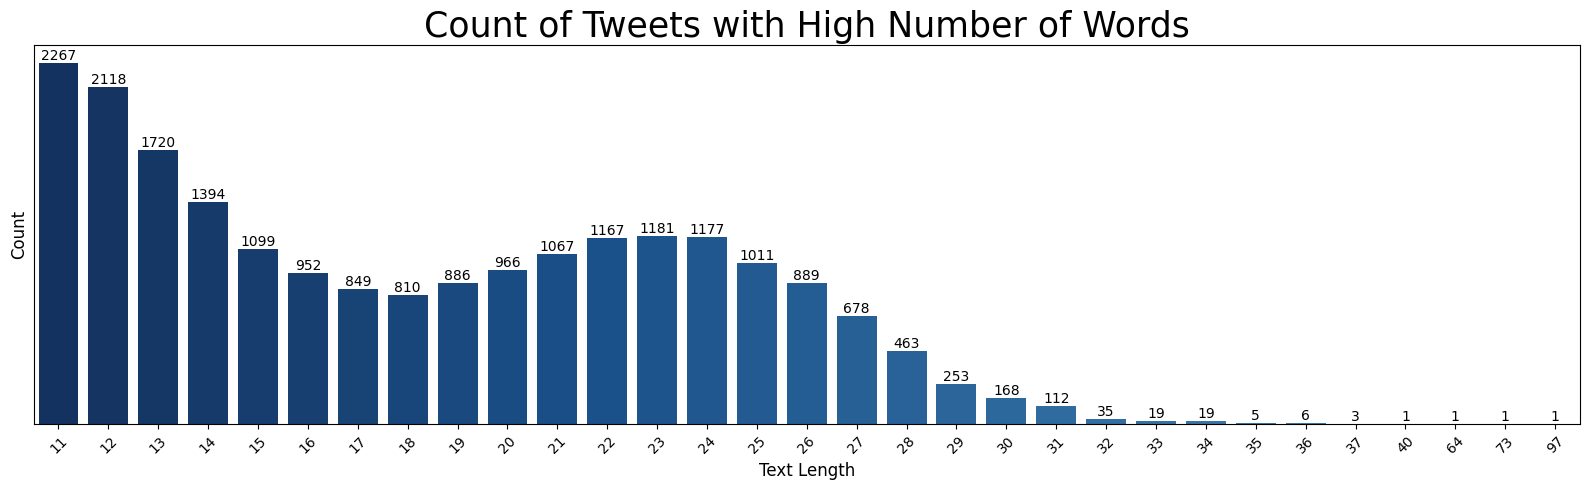

In [73]:
filtered_data = data_cleaned[(data_cleaned['TweetText_len'] > 10)]

# Plot the text length distribution using a bar chart
plt.figure(figsize=(16, 5))
ax = sns.countplot(
    x='TweetText_len',
    hue='TweetText_len',
    data=filtered_data,
    palette='Blues_r',
    legend=False,
    order=filtered_data['TweetText_len'].value_counts().sort_index().index
)

# Add title and axis labels
plt.title('Count of Tweets with High Number of Words', fontsize=25)
plt.yticks([])  # Remove y-axis ticks
plt.ylabel('Count', fontsize=12)
plt.xlabel('Text Length', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Annotate the bars with counts
for container in ax.containers:
    ax.bar_label(container)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

In [74]:
data_cleaned.sort_values(by=['TweetText_len'], ascending=False)

,TweetText,Sentiment,TweetText_clean,TweetText_len
2031,he embellished the afternoon with moustachioed...,not_cyberbullying,embellished afternoon moustachioed feint flick...,97
3219,@andrea_gcav: @viviaanajim recuerdas como noso...,not_cyberbullying,recuerdas como nosotras tambin eramos victimas...,73
32494,@jasminelovvee if he dont want you well fuck h...,ethnicity,want well fuck worth tear never sweat dumb nig...,64
17724,and yet god was able to meet their needs using...,religion,yet god able meet need using radical everyday ...,40
34104,fuck fuck georgegambnino georgegambnino nigeri...,ethnicity,fuck fuck georgegambnino georgegambnino nigeri...,37
...,...,...,...,...
32957,"oh rt""@tayyoung_: fuck obama, dumb ass nigger""",ethnicity,fuck obama dumb nigger,4
10554,@tskillet69 feminazi- the dress is being raped...,gender,feminazi dress raped privelige,4
15460,rt @damocles247: please sign this petition + r...,religion,please sign petition retweet,4
1243,@jaymgates on behalf of engineers i'm offend- ...,not_cyberbullying,behalf engineer offend okay,4


In [75]:
# Count the number of rows where TweetText_len > 100
count = len(data_cleaned[data_cleaned['TweetText_len'] > 100])
print(f"Number of tweets with length greater than 100: {count}")

# Remove the rows where TweetText_len > 100
data_cleaned = data_cleaned[data_cleaned['TweetText_len'] <= 100]


Number of tweets with length greater than 100: 0


In [76]:
max_tweet_len = data_cleaned['TweetText_len'].max()
max_tweet_len

97

In [77]:
data_cleaned = data_cleaned.reset_index(drop=True)
data_cleaned.sort_values(by=['TweetText_len'], ascending=False)

,TweetText,Sentiment,TweetText_clean,TweetText_len
2031,he embellished the afternoon with moustachioed...,not_cyberbullying,embellished afternoon moustachioed feint flick...,97
3219,@andrea_gcav: @viviaanajim recuerdas como noso...,not_cyberbullying,recuerdas como nosotras tambin eramos victimas...,73
32494,@jasminelovvee if he dont want you well fuck h...,ethnicity,want well fuck worth tear never sweat dumb nig...,64
17724,and yet god was able to meet their needs using...,religion,yet god able meet need using radical everyday ...,40
34104,fuck fuck georgegambnino georgegambnino nigeri...,ethnicity,fuck fuck georgegambnino georgegambnino nigeri...,37
...,...,...,...,...
32957,"oh rt""@tayyoung_: fuck obama, dumb ass nigger""",ethnicity,fuck obama dumb nigger,4
10554,@tskillet69 feminazi- the dress is being raped...,gender,feminazi dress raped privelige,4
15460,rt @damocles247: please sign this petition + r...,religion,please sign petition retweet,4
1243,@jaymgates on behalf of engineers i'm offend- ...,not_cyberbullying,behalf engineer offend okay,4


In [78]:
data_cleaned.shape

(35660, 4)

In [79]:
data_cleaned.head(5)

,TweetText,Sentiment,TweetText_clean,TweetText_len
0,"in other words #katandandre, your food was cra...",not_cyberbullying,word katandandre food crapilicious,4
1,@xochitlsuckkks a classy whore? or more red ve...,not_cyberbullying,classy whore red velvet cupcake,5
2,"@jason_gio meh. :p thanks for the heads up, b...",not_cyberbullying,meh thanks head concerned another angry dude t...,8
3,@rudhoeenglish this is an isis account pretend...,not_cyberbullying,isi account pretending kurdish account like is...,8
4,"@raja5aab @quickieleaks yes, the test of god i...",not_cyberbullying,yes test god good bad indifferent weird whatev...,11


In [80]:
data_cleaned

,TweetText,Sentiment,TweetText_clean,TweetText_len
0,"in other words #katandandre, your food was cra...",not_cyberbullying,word katandandre food crapilicious,4
1,@xochitlsuckkks a classy whore? or more red ve...,not_cyberbullying,classy whore red velvet cupcake,5
2,"@jason_gio meh. :p thanks for the heads up, b...",not_cyberbullying,meh thanks head concerned another angry dude t...,8
3,@rudhoeenglish this is an isis account pretend...,not_cyberbullying,isi account pretending kurdish account like is...,8
4,"@raja5aab @quickieleaks yes, the test of god i...",not_cyberbullying,yes test god good bad indifferent weird whatev...,11
...,...,...,...,...
35655,"black ppl aren't expected to do anything, depe...",ethnicity,black people eected anything depended anything...,21
35656,turner did not withhold his disappointment. tu...,ethnicity,turner withhold disappointment turner called c...,29
35657,i swear to god. this dumb nigger bitch. i have...,ethnicity,swear god dumb nigger bitch got bleach hair re...,12
35658,yea fuck you rt @therealexel: if youre a nigge...,ethnicity,yea fuck nigger fucking unfollow fucking dumb ...,8


**# Data Explaration after Data Preprocessing**

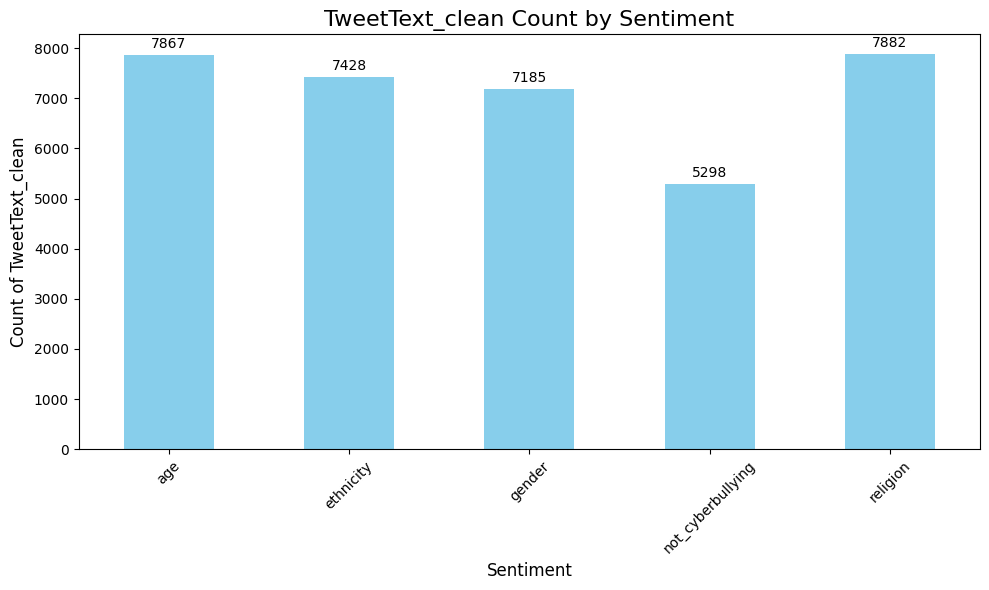

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by the original 'Sentiment' column and count 'TweetText_clean'
sentiment_counts = data_cleaned.groupby('Sentiment')['TweetText_clean'].count()

# Plot the counts as a bar chart
ax = sentiment_counts.plot(kind='bar', color='skyblue', figsize=(10, 6))

# Add value labels on top of each bar
for i, value in enumerate(sentiment_counts):
    ax.annotate(str(value), xy=(i, value), xytext=(0, 5), 
                textcoords='offset points', ha='center', fontsize=10)

# Add titles and labels
plt.title('TweetText_clean Count by Sentiment', fontsize=16)
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count of TweetText_clean', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

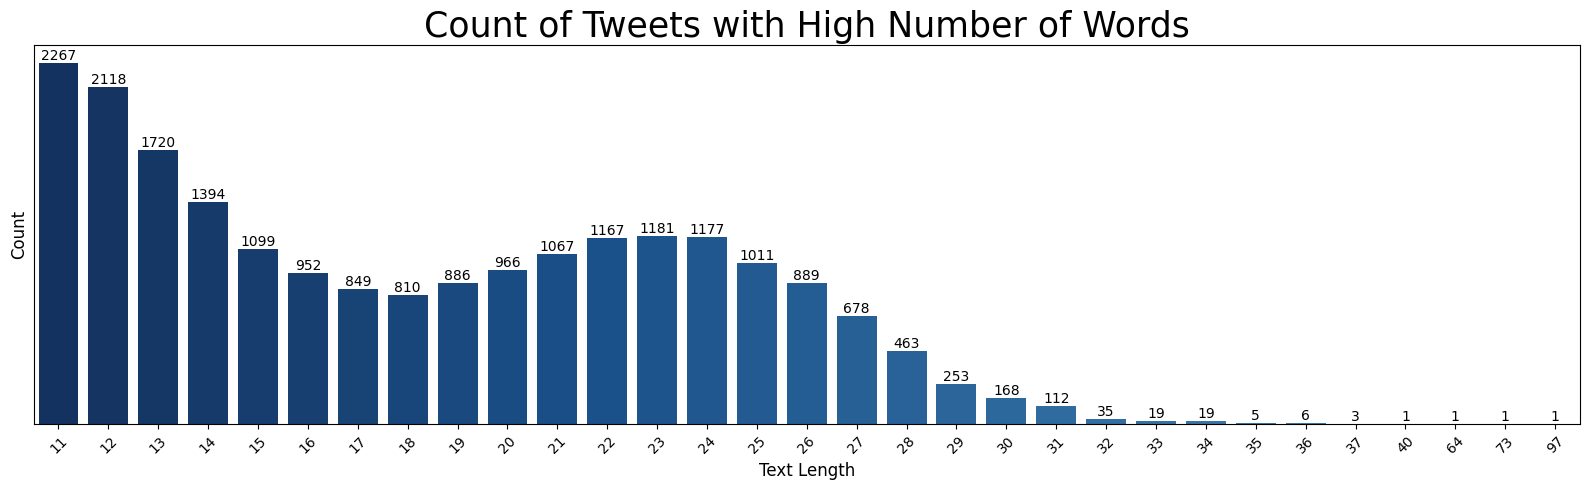

In [82]:
# Filter the dataset for text lengths within the desired range
filtered_data = data_cleaned[(data_cleaned['TweetText_len'] > 10)]

# Plot the text length distribution using a bar chart
plt.figure(figsize=(16, 5))
ax = sns.countplot(
    x='TweetText_len',
    hue='TweetText_len',
    data=filtered_data,
    palette='Blues_r',
    legend=False,
    order=filtered_data['TweetText_len'].value_counts().sort_index().index
)

# Add title and axis labels
plt.title('Count of Tweets with High Number of Words', fontsize=25)
plt.yticks([])  # Remove y-axis ticks
plt.ylabel('Count', fontsize=12)
plt.xlabel('Text Length', fontsize=12)
plt.xticks(rotation=45, fontsize=10)

# Annotate the bars with counts
for container in ax.containers:
    ax.bar_label(container)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

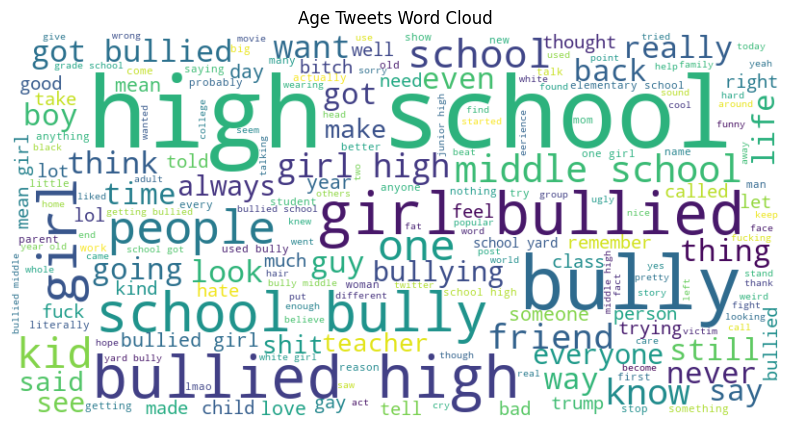

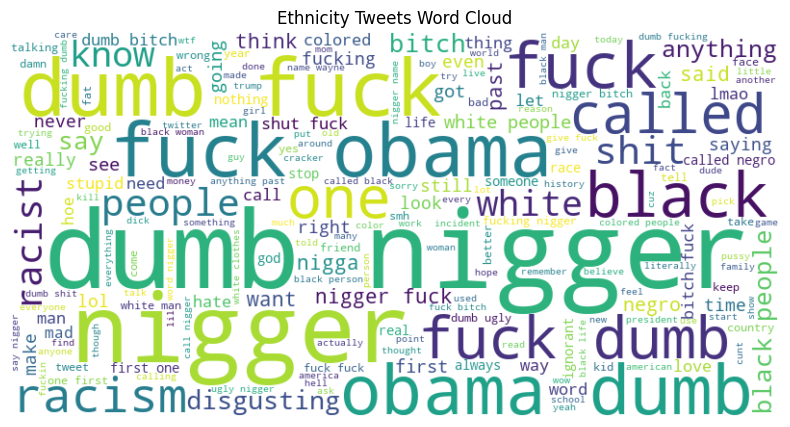

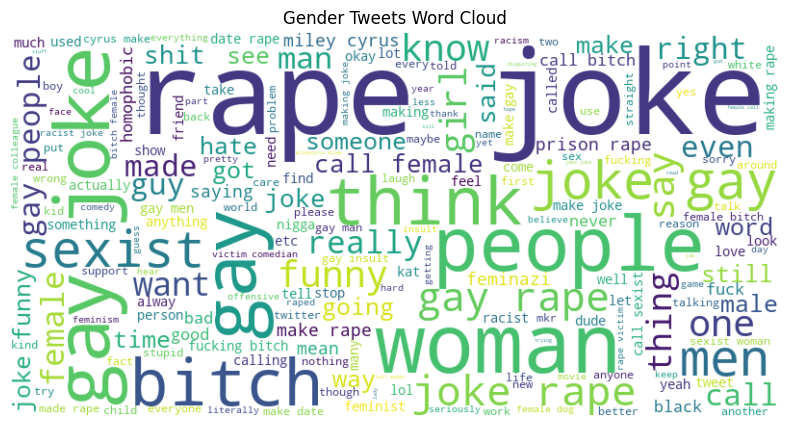

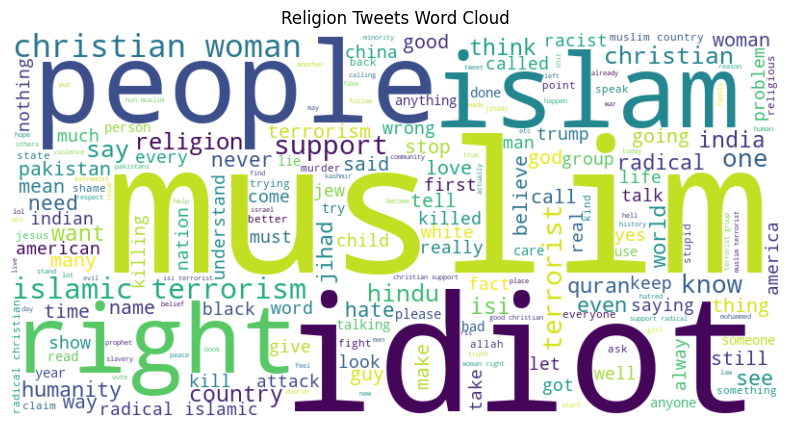

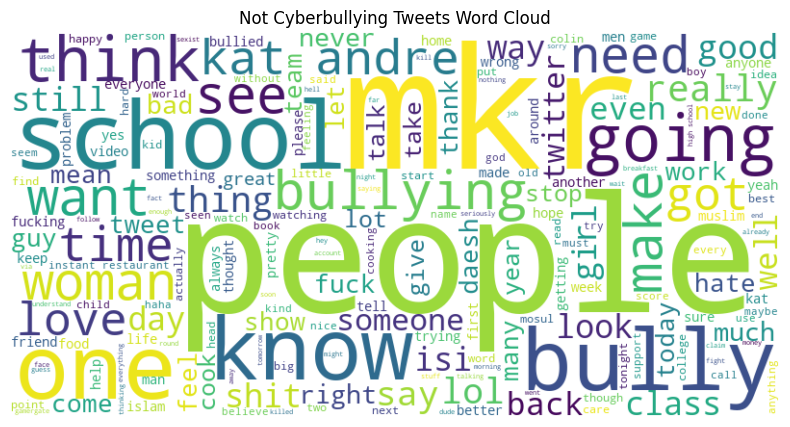

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

age_tweets = data_cleaned[data_cleaned['Sentiment'] == 'age']
ethnicity_tweets = data_cleaned[data_cleaned['Sentiment'] == 'ethnicity']
gender_tweets = data_cleaned[data_cleaned['Sentiment'] == 'gender']
notCB_tweets = data_cleaned[data_cleaned['Sentiment'] == 'not_cyberbullying']
religion_tweets = data_cleaned[data_cleaned['Sentiment'] == 'religion']

# Combine all positive reviews into a single string
age_text = ' '.join(age_tweets['TweetText_clean'].astype(str))
ethnicity_text = ' '.join(ethnicity_tweets['TweetText_clean'].astype(str))
gender_text = ' '.join(gender_tweets['TweetText_clean'].astype(str))
notCB_text = ' '.join(notCB_tweets['TweetText_clean'].astype(str))
religion_text = ' '.join(religion_tweets['TweetText_clean'].astype(str))

# Generate the word cloud for positive reviews
age_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(age_text)
ethnicity_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ethnicity_text)
gender_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(gender_text)
notCB_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(notCB_text)
religion_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(religion_text)

# Display the word cloud for positive reviews
plt.figure(figsize=(10, 5))
plt.title("Age Tweets Word Cloud")
plt.imshow(age_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Display the word cloud for negative reviews
plt.figure(figsize=(10, 5))
plt.title("Ethnicity Tweets Word Cloud")
plt.imshow(ethnicity_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Display the word cloud for negative reviews
plt.figure(figsize=(10, 5))
plt.title("Gender Tweets Word Cloud")
plt.imshow(gender_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Display the word cloud for negative reviews
plt.figure(figsize=(10, 5))
plt.title("Religion Tweets Word Cloud")
plt.imshow(religion_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# Display the word cloud for negative reviews
plt.figure(figsize=(10, 5))
plt.title("Not Cyberbullying Tweets Word Cloud")
plt.imshow(notCB_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# **Encoding**

In [84]:
data_cleaned['Sentiment'] = data_cleaned['Sentiment'].replace({'religion':0,'age':1,'ethnicity':2,'gender':3,'not_cyberbullying':4})

In [85]:
data_cleaned.head()

,TweetText,Sentiment,TweetText_clean,TweetText_len
0,"in other words #katandandre, your food was cra...",4,word katandandre food crapilicious,4
1,@xochitlsuckkks a classy whore? or more red ve...,4,classy whore red velvet cupcake,5
2,"@jason_gio meh. :p thanks for the heads up, b...",4,meh thanks head concerned another angry dude t...,8
3,@rudhoeenglish this is an isis account pretend...,4,isi account pretending kurdish account like is...,8
4,"@raja5aab @quickieleaks yes, the test of god i...",4,yes test god good bad indifferent weird whatev...,11


# **Split**

In [86]:
from sklearn.model_selection import train_test_split

X = data_cleaned['TweetText_clean']
y = data_cleaned['Sentiment']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [87]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
X_val.to_csv('X_val.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
y_val.to_csv('y_val.csv', index=False)

In [88]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)
print("y_val shape:", y_val.shape)

X_train shape: (28528,)
X_test shape: (3566,)
X_val shape: (3566,)
y_train shape: (28528,)
y_test shape: (3566,)
y_val shape: (3566,)


In [89]:
import numpy as np

(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 6306],
       [   1, 6294],
       [   2, 5942],
       [   3, 5748],
       [   4, 4238]], dtype=int64)

In [93]:
data_cleaned.head()

,TweetText,Sentiment,TweetText_clean,TweetText_len
0,"in other words #katandandre, your food was cra...",4,word katandandre food crapilicious,4
1,@xochitlsuckkks a classy whore? or more red ve...,4,classy whore red velvet cupcake,5
2,"@jason_gio meh. :p thanks for the heads up, b...",4,meh thanks head concerned another angry dude t...,8
3,@rudhoeenglish this is an isis account pretend...,4,isi account pretending kurdish account like is...,8
4,"@raja5aab @quickieleaks yes, the test of god i...",4,yes test god good bad indifferent weird whatev...,11


In [94]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35660 entries, 0 to 35659
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TweetText        35660 non-null  object
 1   Sentiment        35660 non-null  int64 
 2   TweetText_clean  35660 non-null  object
 3   TweetText_len    35660 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


# **Pad Sequence**

In [104]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(X_train)

# Convert text to sequences of integers
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)
X_val = tokenizer.texts_to_sequences(X_val)

max_len = 97
X_train = pad_sequences(X_train, maxlen=max_len, padding='pre', truncating='pre')
X_test = pad_sequences(X_test, maxlen=max_len, padding='pre', truncating='pre')
X_val = pad_sequences(X_val, maxlen=max_len, padding='pre', truncating='pre')

In [105]:
print("X train shape: ",X_train.shape)
print("y train shape: ",y_train.shape)

X train shape:  (28528, 97)
y train shape:  (28528,)


# **Undersampling**

In [402]:
# Undersampling
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X_train, y_train)

In [ ]:
(unique, counts) = np.unique(y_train, return_counts=True)
np.asarray((unique, counts)).T

In [406]:
print(np.unique(y_train))  # Output: [0, 1, 2, 3, 4]

[0 1 2 3 4]
